# 1. Importación de paquetes

In [22]:
# Para la lectura y transformación de datos
import pandas as pd

# Para el manejo de vectores
import numpy as np

# Para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para importar el modelo
from sklearn.ensemble import RandomForestClassifier

# Para realizar validación cruzada repetida
from sklearn.model_selection import RepeatedKFold, GridSearchCV

# Para evaluar las predicciones
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# Para obtener la matriz de confusión
from sklearn.metrics import confusion_matrix

# Para guardar el modelo
import pickle

# 2. Lectura de los datasets procedentes del Notebook 3

In [20]:
df_train = pd.read_csv(r'../Dataset_con_transformaciones/df_train_after_notebook3.csv')
df_test = pd.read_csv(r'../Dataset_con_transformaciones/df_test_after_notebook3.csv')

Dividir los conjuntos de train y test en:
- Variables input 
- Variable objetivo

In [21]:
X_train, y_train = df_train.drop(columns=['output']), df_train.output
X_test, y_test = df_test.drop(columns=['output']), df_test.output

# 3. Generación del modelo 

Para hacer validación cruzada repetida, usar RepeatedKFold:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html#sklearn.model_selection.RepeatedKFold

**¿Por qué escoger RepeatedKFold para validación cruzada repetida (y no elegir RepeatedStratifiedKFold)?**

Como los datos no están desbalanceados, no hace falta utilizar RepeatedStratifiedKFold. 

https://medium.com/@venkatasujit272/overview-of-cross-validation-3785d5414ece

**¿Qué scoring escoger?**

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

Como se vio en el módulo "Minería de datos y modelización predictiva - Aida Calviño", para problemas de clasificación, la técnica del área bajo la curva ROC (AUROC) es una medida bastante acertada a la hora de evaluar este tipo de algoritmos predictivos.

In [8]:
model = RandomForestClassifier(random_state=99)

In [9]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300]  # Número de árboles
    'criterion': ['gini', 'entropy', 'log_loss'], # Valores posibles para el criterio de evaluación
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': ['sqrt', 'log2', None],  # Número de características a considerar en cada división
}

In [10]:
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=99) # Validación cruzada repetida

In [11]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 50 folds for each of 648 candidates, totalling 32400 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END b

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, 

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=

[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=5, max_features=sqrt, min_samples_lea

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_l

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_le

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samp

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_dept

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, 

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=5, max_features=

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fea

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_fe

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_sampl

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=auto, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_le

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=5, max_features=sqrt, min_samp

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=auto, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, ma

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_dep

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, m

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fea

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_fe

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, m

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_f

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10,

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=99),
             estimator=RandomForestClassifier(random_state=99),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [12]:
# Parámetros del mejor modelo
print(f"Mejor modelo: { grid_search.best_estimator_ }")
print(f"Mejores parámetros: { grid_search.best_params_ }")
print(f"Area bajo la curva ROC: { grid_search.best_score_ }")

Mejor modelo: RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=99)
Mejores parámetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Area bajo la curva ROC: 0.923743885103831


## 3.1. Modelo con los mejores parámetros

In [13]:
selected_model = grid_search.best_estimator_

y_pred = selected_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



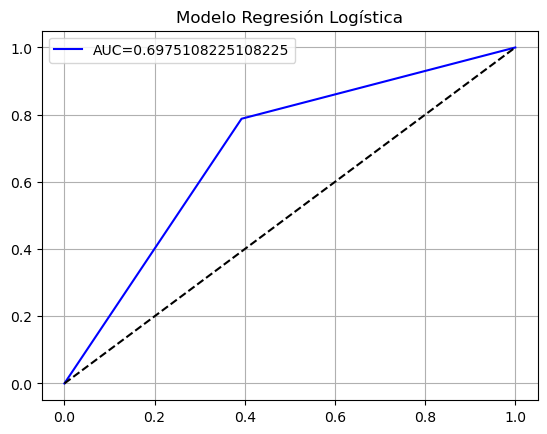

In [16]:
fpr, tpr, tr = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,'b',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.title("Modelo Regresión Logística")
plt.grid()
plt.legend(loc='best')
plt.show()

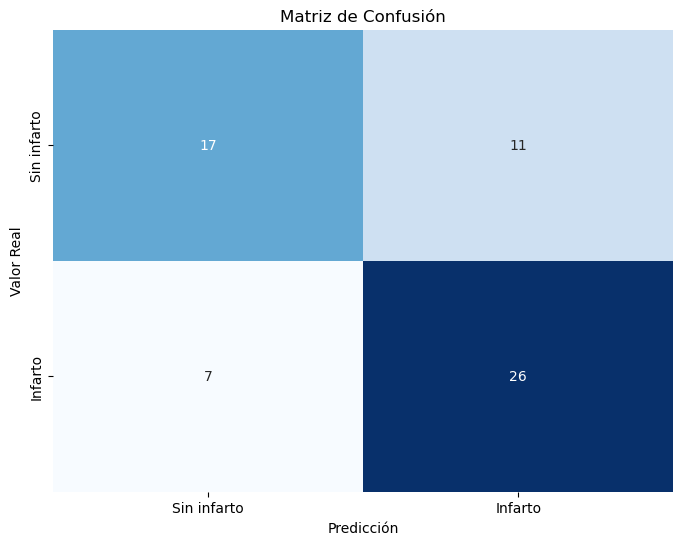

In [17]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor Real')
class_labels = ['Sin infarto', 'Infarto']
heatmap.set_xticklabels(class_labels)
heatmap.set_yticklabels(class_labels)
plt.title('Matriz de Confusión')
plt.show()

# Guardar el modelo resultante de este notebook

In [ ]:
pickle.dump(selected_model, open("random_forest_model.sav", 'wb'))